<a href="https://colab.research.google.com/github/FlameDanita/Neural_Networks_and_CV/blob/master/module05_mnist_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

In [2]:
import torch
from torch import nn

conv = nn.Conv2d(1,1,kernel_size=3, padding=1, stride=2, bias=False)

X = torch.FloatTensor([[[
    [4, 2, -1],
    [-6, 0, 5],
    [3, 2, 2]]]])

conv.weight.data = torch.FloatTensor([[[
    [0, 1, 2],
    [1, -1, 0],
    [1, 0, -2]]]])

res = conv(X).data[0,0]
print(res)

tensor([[-4.,  3.],
        [-9.,  5.]])


![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [7]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [8]:
import torchvision.datasets

In [9]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [10]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [11]:
len(y_train), len(y_test)

(60000, 10000)

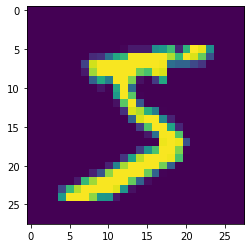

tensor(5)


In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [13]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [14]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [15]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [17]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [32]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9750)
tensor(0.9828)
tensor(0.9859)
tensor(0.9874)
tensor(0.9888)
tensor(0.9881)
tensor(0.9853)
tensor(0.9884)
tensor(0.9887)
tensor(0.9882)
tensor(0.9883)
tensor(0.9900)
tensor(0.9874)
tensor(0.9895)
tensor(0.9895)
tensor(0.9881)
tensor(0.9881)
tensor(0.9887)
tensor(0.9871)
tensor(0.9870)
tensor(0.9883)
tensor(0.9882)
tensor(0.9883)
tensor(0.9892)
tensor(0.9885)
tensor(0.9880)
tensor(0.9893)
tensor(0.9876)
tensor(0.9890)
tensor(0.9897)
tensor(0.9868)
tensor(0.9880)
tensor(0.9898)
tensor(0.9860)
tensor(0.9875)
tensor(0.9882)
tensor(0.9886)
tensor(0.9880)
tensor(0.9885)
tensor(0.9889)
tensor(0.9909)
tensor(0.9895)
tensor(0.9891)
tensor(0.9887)
tensor(0.9888)
tensor(0.9883)
tensor(0.9867)
tensor(0.9888)
tensor(0.9885)
tensor(0.9882)
tensor(0.9885)
tensor(0.9878)
tensor(0.9888)
tensor(0.9881)
tensor(0.9849)
tensor(0.9892)
tensor(0.9889)
tensor(0.9896)
tensor(0.9885)
tensor(0.9894)
tensor(0.9876)


KeyboardInterrupt: ignored

In [33]:
lenet5.forward(X_test)

tensor([[ -0.7045,   1.2322,  -1.3314,  ...,  20.9378,  -5.3419,   5.0719],
        [  2.0014,  -2.1072,  22.8274,  ...,  -3.0251,   3.7595,  -6.3771],
        [ -4.5805,  23.0239,  -1.5756,  ...,   2.0290,   2.9691,  -5.4562],
        ...,
        [ -7.5560,  -3.9009,  -5.3186,  ...,   1.3276,  -0.9122,   6.3076],
        [ -3.9118,  -3.7084,  -7.8499,  ...,  -8.7960,   7.2047,  -5.4678],
        [  3.3775,  -7.0523,  -0.5445,  ..., -15.4440,   1.2767,  -4.3431]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

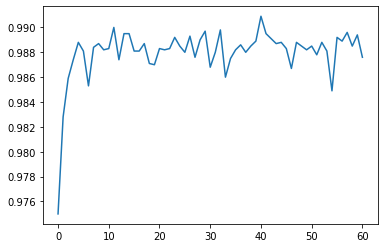

In [35]:
plt.plot(test_accuracy_history);
# plt.plot(test_loss_history);

In [31]:
import torch

N = 4
C = 3
C_out = 10
H = 8
W = 16

x = torch.ones((N, C, H, W))

# torch.Size([4, 10, 8, 16])
out1 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=1)(x)
print(out1.shape) # для самопроверки

# # torch.Size([4, 10, 8, 16])
out2 = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=2)(x)
print(out2.shape) # для самопроверки

# # torch.Size([4, 10, 8, 16])
out3 = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=3)(x)
print(out3.shape) # для самопроверки

# # torch.Size([4, 10, 8, 16])
out4 = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=4)(x)
print(out4.shape) # для самопроверки

# # torch.Size([4, 10, 8, 16])
out5 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=(1, 2))(x)
print(out5.shape) # для самопроверки

# # torch.Size([4, 10, 22, 30])
out6 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=8)(x)
print(out6.shape) # для самопроверки

# # torch.Size([4, 10, 7, 15])
out7 = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=1)(x)
print(out7.shape) # для самопроверки

# # torch.Size([4, 10, 9, 17])
out8 = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=1)(x)
print(out8.shape) # для самопроверки

torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 22, 30])
torch.Size([4, 10, 7, 15])
torch.Size([4, 10, 9, 17])
